# CSCI 1470/2470 Final Project, Fall 2022
## Bitao Jin, James Ro, Christopher Tripp

In [1]:
# import packages
import os
import sys
import h5py  # To interface with the HDF5 binary data format.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preprocessing and Exploration

In [3]:
# Local path to the data.
data_path = "../data/Galaxy10_DECals.h5"

# Get the images and labels from file.
with h5py.File(data_path, 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

In [4]:
# Get the class numbers and the number of examples for each class.
class_ids, class_counts = np.unique(labels, return_counts=True)

# All 10 class names
class_names = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxie without Bulge",
    "Edge-on Galaxies with Bulge"]

In [5]:

# Convert the data to floats.
labels = labels.astype(np.float32)
images = images.astype(np.float32)

**Shapes of Images and Labels**

In [6]:
# print the shapes of images and labels
print(f"Images shape is {images.shape}")
print(f"Labels shape is {labels.shape}")

Images shape is (17736, 256, 256, 3)
Labels shape is (17736,)


Images are 256 x 256 RGB files.

In [7]:
# Print some information about the data set.
print(f"TOTAL NUMBER OF EXAMPLES: {images.shape[0]}")
for class_id, class_count in enumerate(class_counts):
    print(f"Class {class_id} ({class_names[class_id]}) " \
          f"has {class_count} examples.")

TOTAL NUMBER OF EXAMPLES: 17736
Class 0 (Disturbed Galaxies) has 1081 examples.
Class 1 (Merging Galaxies) has 1853 examples.
Class 2 (Round Smooth Galaxies) has 2645 examples.
Class 3 (In-between Round Smooth Galaxies) has 2027 examples.
Class 4 (Cigar Shaped Smooth Galaxies) has 334 examples.
Class 5 (Barred Spiral Galaxies) has 2043 examples.
Class 6 (Unbarred Tight Spiral Galaxies) has 1829 examples.
Class 7 (Unbarred Loose Spiral Galaxies) has 2628 examples.
Class 8 (Edge-on Galaxie without Bulge) has 1423 examples.
Class 9 (Edge-on Galaxies with Bulge) has 1873 examples.


Next let's display one image from each class, just to make sure the data looks ok.

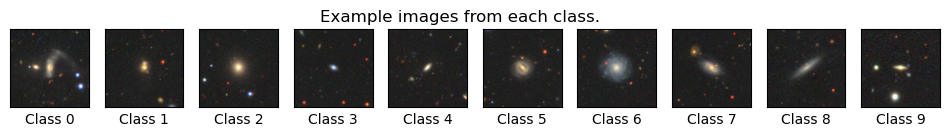

In [6]:
# Get indices of first image for each class.
first_img_indices = []
for i in range(0, 10):
    this_class_starting_index = np.where(labels == i)[0][0]
    first_img_indices.append(this_class_starting_index)

# Plot the corresponding images.
fig, ax = plt.subplots(1, 10)
fig.set_size_inches(12, 1.2)
for i, each_image in enumerate(first_img_indices):
    ax[i].imshow(images[each_image].astype('uint8'))
    ax[i].tick_params(left=False)
    ax[i].tick_params(bottom=False)
    ax[i].tick_params(labelleft=False)
    ax[i].tick_params(labelbottom=False)
    ax[i].set_xlabel(f"Class {i}")
fig.suptitle("Example images from each class.")
plt.show()

We can then visualize what our preprocessed images should look like with Center Crop:

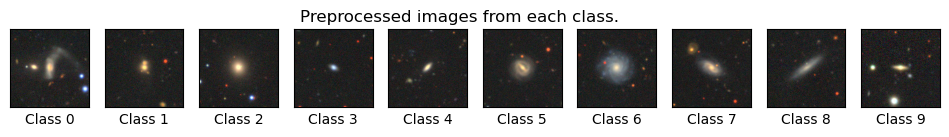

In [8]:
# Plot the preprocessed images.
fig, ax = plt.subplots(1, 10)
fig.set_size_inches(12, 1.2)
for i, each_image in enumerate(first_img_indices):
    image = images[each_image].astype('uint8')
    preprocessed_images = tf.keras.Sequential(
        [
        tf.keras.layers.CenterCrop(224, 224),
        ]
    )(image)
    ax[i].imshow(preprocessed_images)
    ax[i].tick_params(left=False)
    ax[i].tick_params(bottom=False)
    ax[i].tick_params(labelleft=False)
    ax[i].tick_params(labelbottom=False)
    ax[i].set_xlabel(f"Class {i}")
fig.suptitle("Preprocessed images from each class.")
plt.show()

Notice the only slight differences between the sample images and the preprocessed images.

Next, we can look at what the augmented images look like with with Random Rotation and Random Flip:

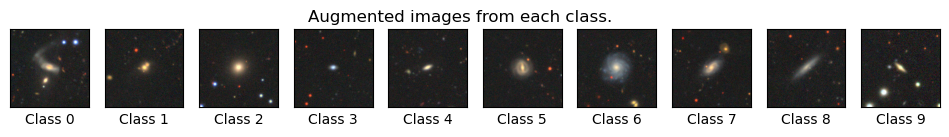

In [9]:
# Plot the augmented images.
fig, ax = plt.subplots(1, 10)
fig.set_size_inches(12, 1.2)
for i, each_image in enumerate(first_img_indices):
    image = images[each_image].astype('uint8')
    augmented_images = tf.keras.Sequential(
        [
        tf.keras.layers.RandomRotation(45.0),
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        ]
    )(image)
    ax[i].imshow(augmented_images)
    ax[i].tick_params(left=False)
    ax[i].tick_params(bottom=False)
    ax[i].tick_params(labelleft=False)
    ax[i].tick_params(labelbottom=False)
    ax[i].set_xlabel(f"Class {i}")
fig.suptitle("Augmented images from each class.")
plt.show()

We can see how data augmentation completely rotates or flips each sample image, where the sample images and augmented images look quite different from one another. This is good, because this will help improve the performance of our model.

## Creating the Single-layer CNN Model

In [8]:
%load_ext autoreload
%autoreload 2
import galaxy_project

Started splitting the data.
Finished splitting the data.
Starting model training.
Epoch 1/50
125/125 [==============================] - 105s 812ms/step - loss: 2.2517 - categorical_accuracy: 0.2656 - val_loss: 1.9374 - val_categorical_accuracy: 0.3149
Epoch 2/50
125/125 [==============================] - 47s 375ms/step - loss: 1.7443 - categorical_accuracy: 0.3844 - val_loss: 1.6435 - val_categorical_accuracy: 0.4179
Epoch 3/50
125/125 [==============================] - 32s 260ms/step - loss: 1.6315 - categorical_accuracy: 0.4217 - val_loss: 1.4939 - val_categorical_accuracy: 0.4705
Epoch 4/50
125/125 [==============================] - 29s 236ms/step - loss: 1.5470 - categorical_accuracy: 0.4582 - val_loss: 1.6001 - val_categorical_accuracy: 0.4476
Epoch 5/50
125/125 [==============================] - 31s 249ms/step - loss: 1.4974 - categorical_accuracy: 0.4689 - val_loss: 1.4447 - val_categorical_accuracy: 0.4938
Epoch 6/50
125/125 [==============================] - 42s 333ms/step - l

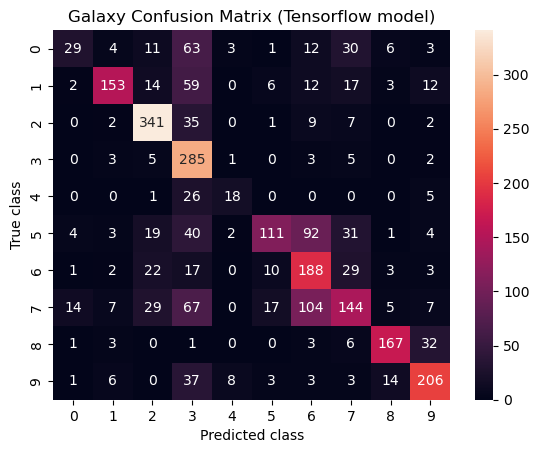

In [11]:
galaxy_project.run_cnn_model(images, labels, multi=False)

Above, we can see the confusion matrix for the single-layer CNN model. Our categorical cross-entropy loss comes in at 1.1306 and our accuracy is calculated to be 0.6102.

## Creating the Multi-layer CNN Model

Started splitting the data.
Finished splitting the data.


2022-12-10 23:14:10.796306: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Starting model training.
Epoch 1/50
125/125 [==============================] - 76s 581ms/step - loss: 1.9733 - categorical_accuracy: 0.3409 - val_loss: 1.7042 - val_categorical_accuracy: 0.3510
Epoch 2/50
125/125 [==============================] - 56s 452ms/step - loss: 1.4844 - categorical_accuracy: 0.4681 - val_loss: 1.4007 - val_categorical_accuracy: 0.5167
Epoch 3/50
125/125 [==============================] - 74s 598ms/step - loss: 1.3607 - categorical_accuracy: 0.5205 - val_loss: 1.2960 - val_categorical_accuracy: 0.5209
Epoch 4/50
125/125 [==============================] - 92s 737ms/step - loss: 1.2867 - categorical_accuracy: 0.5438 - val_loss: 1.2143 - val_categorical_accuracy: 0.5434
Epoch 5/50
125/125 [==============================] - 54s 435ms/step - loss: 1.2217 - categorical_accuracy: 0.5702 - val_loss: 1.1597 - val_categorical_accuracy: 0.5923
Epoch 6/50
125/125 [==============================] - 43s 348ms/step - loss: 1.1613 - categorical_accuracy: 0.5912 - val_loss: 1.2

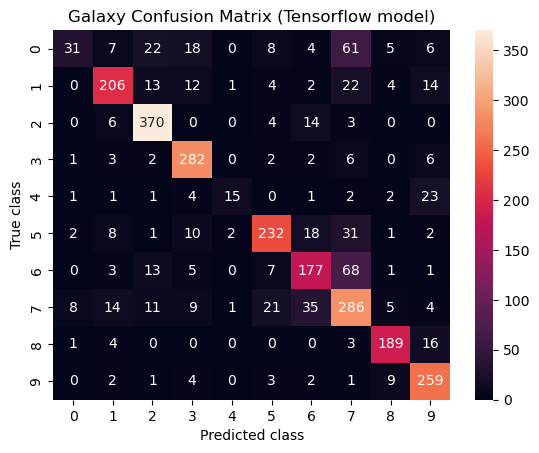

In [8]:
galaxy_project.run_cnn_model(images, labels, multi=True)

Above, we can see the confusion matrix for the multi-layer CNN model. Our categorical cross-entropy loss comes in at 0.7124 and our accuracy is calculated to be 0.7662, which was significantly higher than the accuracy we observed for the single-layer model.